<h1><center><b><u>MARKETING PLATFORM TO BE OPTED FOR INCREASE IN SALES </h1></center></b></u> 
<br>
<H3><B><U>TEAM MEMBERS:</B></U><BR>
MADHURA K R (2048041) <BR>
R AKHILANDESHWARI (2048046) <BR></H3>


# LOADING THE PACKAGES

In [37]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import plotly.express as ex
plt.rc('figure',figsize=(15,10))
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# IMPORTING THE DATA

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
r_data= pd.read_excel('/content/drive/My Drive/MARKETING_RAW_DATA.xlsx')
#r_data= pd.read_excel("/content/MARKETING_RAW_DATA.xlsx")
r_data.head()

,Timestamp,Name,Age,Gender,State,Count of family members,What is your educational status?,What is your occupation?,What is your annual income?,How did you come to know about a particular electronic gadget that you ended up buying?,Which are the following factors will affect your preference for electronic gadgets?,"Are majority of the electronic devices you own, from one specific company or brand?",Do you like owning the latest tech and electronic products?,"Which platform do you refer to, before buying an electronic product?",How did you come to know about a particular furniture that you ended up buying?,Which are the following factors will affect your preference for furniture?,Is compactness of furniture is preferred by you?,Which furniture do u prefer the most?,"Which platform do you refer to, before buying a furniture product?",How did you come to know about a particular automobile that you ended up buying?,Which are the following factors will affect your preference for automobile?,Does budget impact you?,Do you prefer new models as and when it comes into market?,"Which platform do you refer to, before buying automobiles product?",How did you come to know about a particular real estate that you ended up buying?,Do you buy a plot based on facilities available nearby or comfort levels in plot/area?,Which area is mostly preferred for buying?,Which land will you prefer while buying?,Budget likely to be invested,"Which platform do you refer to, before buying land?"
0,2021-04-04 16:11:33.777,Viola D Souza,22,Female,Karnataka,5.0,Post graduate,Student,1–4 lakhs,Online ads,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Design,Yes,Wood,"Social media, TV (Digital marketing)",Online ads,Quality,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,Availability,Urban,Independent Villa,10 - 40 lakhs,"Social media, TV (Digital marketing)"
1,2021-04-04 16:12:33.816,Vignesh,16,Male,Telangana,5.0,Secondary,Student,4 – 8 lakhs,Through a friend or family,Quality,Yes,Maybe,Both,Through a friend or family,All the above,Maybe,Wood,Both,Online ads,Brand,Yes,No,"Social media, TV (Digital marketing)",Online ads,All,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)
2,2021-04-04 16:13:39.423,Thejus,21,Male,Kerala,4.0,Post graduate,Student,1–4 lakhs,Through a friend or family,All the above,Maybe,Yes,Newspaper ads/banners(Traditional marketing),Through a friend or family,Scope of Life,Yes,Wood,Newspaper ads/banners(Traditional marketing),Newspaper,Brand,Yes,No,Newspaper ads/banners(Traditional marketing),Through a friend or family,All,Urban,Plot in the gated community,10 - 40 lakhs,"Social media, TV (Digital marketing)"
3,2021-04-04 16:14:32.210,Sanketh,21,Male,Telangana,4.0,Graduate,Private job,1–4 lakhs,Through a friend or family,All the above,No,Yes,Both,Online ads,All the above,Maybe,Wood,Both,Through a friend or family,All the above,Maybe,Maybe,Both,Banners,All,Outskirts,Plot in the gated community,10 - 40 lakhs,Both
4,2021-04-04 16:14:57.482,Rupal D'Souza,22,Female,Karnataka,4.0,Post graduate,Student,4 – 8 lakhs,Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,Wood,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Comforts,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)


# Analysing the dataset

In [4]:
r_data.shape

(516, 30)

<b><h3> The data contains 30 attributes with 516 records.</b></h3>

In [5]:
# Droping the Timestamp and Name column from the data. As it is not useful for the ananlysis
r_data.drop(['Timestamp','Name'], axis=1, inplace=True)
r_data.head()

,Age,Gender,State,Count of family members,What is your educational status?,What is your occupation?,What is your annual income?,How did you come to know about a particular electronic gadget that you ended up buying?,Which are the following factors will affect your preference for electronic gadgets?,"Are majority of the electronic devices you own, from one specific company or brand?",Do you like owning the latest tech and electronic products?,"Which platform do you refer to, before buying an electronic product?",How did you come to know about a particular furniture that you ended up buying?,Which are the following factors will affect your preference for furniture?,Is compactness of furniture is preferred by you?,Which furniture do u prefer the most?,"Which platform do you refer to, before buying a furniture product?",How did you come to know about a particular automobile that you ended up buying?,Which are the following factors will affect your preference for automobile?,Does budget impact you?,Do you prefer new models as and when it comes into market?,"Which platform do you refer to, before buying automobiles product?",How did you come to know about a particular real estate that you ended up buying?,Do you buy a plot based on facilities available nearby or comfort levels in plot/area?,Which area is mostly preferred for buying?,Which land will you prefer while buying?,Budget likely to be invested,"Which platform do you refer to, before buying land?"
0,22,Female,Karnataka,5.0,Post graduate,Student,1–4 lakhs,Online ads,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Design,Yes,Wood,"Social media, TV (Digital marketing)",Online ads,Quality,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,Availability,Urban,Independent Villa,10 - 40 lakhs,"Social media, TV (Digital marketing)"
1,16,Male,Telangana,5.0,Secondary,Student,4 – 8 lakhs,Through a friend or family,Quality,Yes,Maybe,Both,Through a friend or family,All the above,Maybe,Wood,Both,Online ads,Brand,Yes,No,"Social media, TV (Digital marketing)",Online ads,All,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)
2,21,Male,Kerala,4.0,Post graduate,Student,1–4 lakhs,Through a friend or family,All the above,Maybe,Yes,Newspaper ads/banners(Traditional marketing),Through a friend or family,Scope of Life,Yes,Wood,Newspaper ads/banners(Traditional marketing),Newspaper,Brand,Yes,No,Newspaper ads/banners(Traditional marketing),Through a friend or family,All,Urban,Plot in the gated community,10 - 40 lakhs,"Social media, TV (Digital marketing)"
3,21,Male,Telangana,4.0,Graduate,Private job,1–4 lakhs,Through a friend or family,All the above,No,Yes,Both,Online ads,All the above,Maybe,Wood,Both,Through a friend or family,All the above,Maybe,Maybe,Both,Banners,All,Outskirts,Plot in the gated community,10 - 40 lakhs,Both
4,22,Female,Karnataka,4.0,Post graduate,Student,4 – 8 lakhs,Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,Wood,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Comforts,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)


In [6]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 28 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Age                                                                                      516 non-null    int64  
 1   Gender                                                                                   516 non-null    object 
 2   State                                                                                    516 non-null    object 
 3   Count of family members                                                                  500 non-null    float64
 4   What is your educational status?                                                         516 non-null    object 
 5   What is your occupation?                                        

<b><h3> All the attributes in the data are categorical except Age and Family count which are int and float type respectively.</b></h3>

---



## Renaming the columns

In [7]:
r_data.columns=["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","E_first","E_prefer","E_brand","E_latest",
              "E_platform","F_first","F_prefer","F_compact","F_type","F_platform","A_first","A_prefer","A_budget","A_latest",
              "A_platform","R_first","R_plots","R_area","R_land","R_budget","R_platform"]

In [8]:
r_data.head()

,Age,Gender,State,Family_count,Edu_status,Occup_n,Income,E_first,E_prefer,E_brand,E_latest,E_platform,F_first,F_prefer,F_compact,F_type,F_platform,A_first,A_prefer,A_budget,A_latest,A_platform,R_first,R_plots,R_area,R_land,R_budget,R_platform
0,22,Female,Karnataka,5.0,Post graduate,Student,1–4 lakhs,Online ads,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Design,Yes,Wood,"Social media, TV (Digital marketing)",Online ads,Quality,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,Availability,Urban,Independent Villa,10 - 40 lakhs,"Social media, TV (Digital marketing)"
1,16,Male,Telangana,5.0,Secondary,Student,4 – 8 lakhs,Through a friend or family,Quality,Yes,Maybe,Both,Through a friend or family,All the above,Maybe,Wood,Both,Online ads,Brand,Yes,No,"Social media, TV (Digital marketing)",Online ads,All,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)
2,21,Male,Kerala,4.0,Post graduate,Student,1–4 lakhs,Through a friend or family,All the above,Maybe,Yes,Newspaper ads/banners(Traditional marketing),Through a friend or family,Scope of Life,Yes,Wood,Newspaper ads/banners(Traditional marketing),Newspaper,Brand,Yes,No,Newspaper ads/banners(Traditional marketing),Through a friend or family,All,Urban,Plot in the gated community,10 - 40 lakhs,"Social media, TV (Digital marketing)"
3,21,Male,Telangana,4.0,Graduate,Private job,1–4 lakhs,Through a friend or family,All the above,No,Yes,Both,Online ads,All the above,Maybe,Wood,Both,Through a friend or family,All the above,Maybe,Maybe,Both,Banners,All,Outskirts,Plot in the gated community,10 - 40 lakhs,Both
4,22,Female,Karnataka,4.0,Post graduate,Student,4 – 8 lakhs,Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,Wood,"Social media, TV (Digital marketing)",Through a friend or family,All the above,Yes,No,"Social media, TV (Digital marketing)",Online ads,Comforts,Outskirts,Independent Villa,40 - 1 Crore,Newspaper ads/banners(Traditional marketing)


# Finding the missing values in the data

In [12]:
r_data.isnull().sum()

Age              0
Gender           0
State            0
Family_count    16
Edu_status       0
Occup_n          0
Income           0
E_first          0
E_prefer         4
E_brand          0
E_latest         0
E_platform       0
F_first          0
F_prefer         0
F_compact        0
F_type           0
F_platform       0
A_first          0
A_prefer         0
A_budget         0
A_latest         0
A_platform       0
R_first          0
R_plots          0
R_area           2
R_land           0
R_budget         0
R_platform       0
dtype: int64

<b><h3> The following column contains misssing values </h3><br>

1.   Count of family members  -    16
2.   Which are the following factors will affect your preference for electronic gadgets?   - 4
3. Which area is mostly preferred for buying? -  2

In [13]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 

imp_median.fit(r_data[['Family_count']])
r_data['Family_count']= imp_median.transform(r_data[['Family_count']])

imp_mode.fit(r_data[['E_prefer']])
r_data['E_prefer']= imp_mode.transform(r_data[['E_prefer']])

imp_mode.fit(r_data[['R_area']])
r_data['R_area']= imp_mode.transform(r_data[['R_area']])

<h3><b> I have used SimpleImputer to impute the missing values in the data. I have imputed the Count of family members using Median method. As other two columns are categorical I have used Mode to impute its missing values. </B></H3>

In [14]:
r_data.isnull().sum()

Age             0
Gender          0
State           0
Family_count    0
Edu_status      0
Occup_n         0
Income          0
E_first         0
E_prefer        0
E_brand         0
E_latest        0
E_platform      0
F_first         0
F_prefer        0
F_compact       0
F_type          0
F_platform      0
A_first         0
A_prefer        0
A_budget        0
A_latest        0
A_platform      0
R_first         0
R_plots         0
R_area          0
R_land          0
R_budget        0
R_platform      0
dtype: int64

# Encoding the Data

In [15]:
#Finding the categorical variables in the data
cat_col_names = r_data.columns[r_data.dtypes==object].tolist()

# Checking the levels in Categorical Variables
for var in cat_col_names:
    print(var, ' contains ---> ', len(r_data[var].unique()), ' labels')

Gender  contains --->  2  labels
State  contains --->  12  labels
Edu_status  contains --->  5  labels
Occup_n  contains --->  5  labels
Income  contains --->  4  labels
E_first  contains --->  5  labels
E_prefer  contains --->  5  labels
E_brand  contains --->  3  labels
E_latest  contains --->  3  labels
E_platform  contains --->  3  labels
F_first  contains --->  5  labels
F_prefer  contains --->  6  labels
F_compact  contains --->  3  labels
F_type  contains --->  4  labels
F_platform  contains --->  3  labels
A_first  contains --->  5  labels
A_prefer  contains --->  5  labels
A_budget  contains --->  3  labels
A_latest  contains --->  3  labels
A_platform  contains --->  3  labels
R_first  contains --->  5  labels
R_plots  contains --->  3  labels
R_area  contains --->  3  labels
R_land  contains --->  2  labels
R_budget  contains --->  4  labels
R_platform  contains --->  3  labels


In [16]:
from sklearn.preprocessing import LabelEncoder
en_data=r_data.copy()
label_enc = LabelEncoder()
en_data[cat_col_names] = en_data[cat_col_names].apply(lambda col: label_enc.fit_transform(col))

<b><h3> Using the LabelEncoder We have converted the categorical variable to numerical variable.</b></h3>

In [17]:
en_data.head()

,Age,Gender,State,Family_count,Edu_status,Occup_n,Income,E_first,E_prefer,E_brand,E_latest,E_platform,F_first,F_prefer,F_compact,F_type,F_platform,A_first,A_prefer,A_budget,A_latest,A_platform,R_first,R_plots,R_area,R_land,R_budget,R_platform
0,22,0,4,5.0,3,3,0,2,0,2,1,2,2,2,2,3,2,2,4,2,1,2,3,1,2,0,0,2
1,16,1,9,5.0,4,3,1,3,4,2,0,0,3,0,0,3,0,2,1,2,1,2,2,0,0,0,1,1
2,21,1,5,4.0,3,3,0,3,0,0,2,1,3,5,2,3,1,1,1,2,1,1,3,0,2,1,0,2
3,21,1,9,4.0,0,1,0,3,0,1,2,0,2,0,0,3,0,3,0,0,0,0,0,0,0,1,0,0
4,22,0,4,4.0,3,3,1,3,0,2,1,2,3,0,2,3,2,3,0,2,1,2,2,2,0,0,1,1


# Exporting the cleaned data to excel 

In [18]:
r_data.to_excel('Cleaned_Marketing_Data.xlsx')

# <b><u><center> DIVISION OF DATA </B></U></CENTER>

<H2>
1. Electronic Gadgets <BR>
2. Furnitures <BR>
3. Automobiles <BR>
4. Real estate <BR>
</H2> 


In [19]:
eg_d1=r_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","E_first","E_prefer","E_brand","E_latest","E_platform"]]
eg_d2=en_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","E_first","E_prefer","E_brand","E_latest","E_platform"]]

In [20]:
f_d1=r_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","F_first","F_prefer","F_compact","F_type","F_platform"]]
f_d2=en_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","F_first","F_prefer","F_compact","F_type","F_platform"]]

In [21]:
a_d1=r_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","A_first","A_prefer","A_budget","A_latest","A_platform"]]
a_d2=en_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","A_first","A_prefer","A_budget","A_latest","A_platform"]]

In [22]:
re_d1=r_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","R_first","R_plots","R_area","R_land","R_budget","R_platform"]]
re_d2=en_data[["Age","Gender","State","Family_count","Edu_status","Occup_n","Income","R_first","R_plots","R_area","R_land","R_budget","R_platform"]]

#<B> <U> <CENTER> EXPLORATORY DATA ANALYSIS </B> </U> </CENTER>

# ELECTRONIC GADGETS

In [49]:
#Our target variable count
eg_d1['E_platform'].value_counts()

Both                                            254
Social media, TV (Digital marketing)            234
Newspaper ads/banners(Traditional marketing)     28
Name: E_platform, dtype: int64

In [50]:
ex.pie(eg_d1,names='E_platform',title='Marketing Platform Distribution for Electronic Gadgets')

For Electronic gadgets, majority of the customers referred to both Social media and Newspaper ads/banners before buying the electronic gadgets. Very few people referred to just Newspaper ads/banners which is the traditional way of marketing.

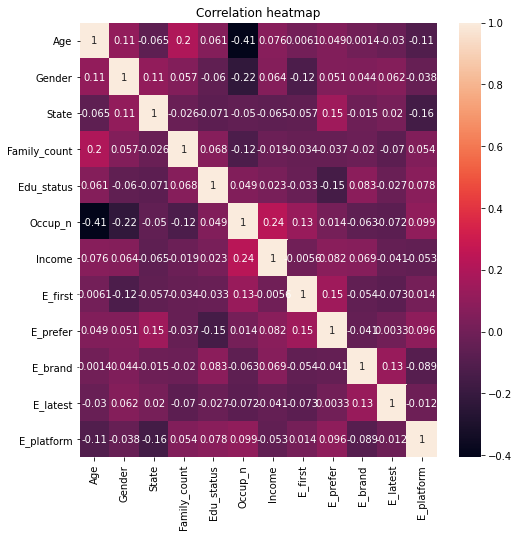

In [51]:
ax = plt.axes()
#plt.rc('figure',figsize=(7,7))
sns.heatmap(eg_d2.corr('pearson'),annot=True,ax=ax)
ax.set_title('Correlation heatmap')
plt.show()

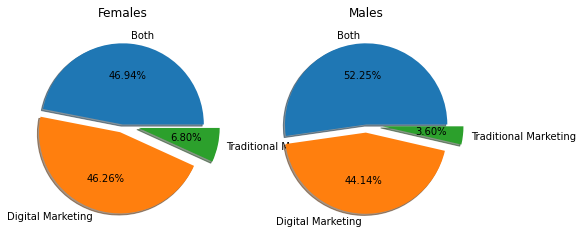

In [52]:
sizes_f = eg_d1.loc[eg_d1['Gender']=='Female']['E_platform'].value_counts()
sizes_m = eg_d1.loc[eg_d1['Gender']=='Male']['E_platform'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax2.title.set_text('Males')
plt.show()


* For Electronic gadgets, majority of the customers referred to both Social media and Newspaper ads/banners before buying the electronic gadgets. Very few people referred to just Newspaper ads/banners which is the traditional way of marketing.

* Among the people who referred to just Newspaper ads/banners, female customers occupied a higher percentage.



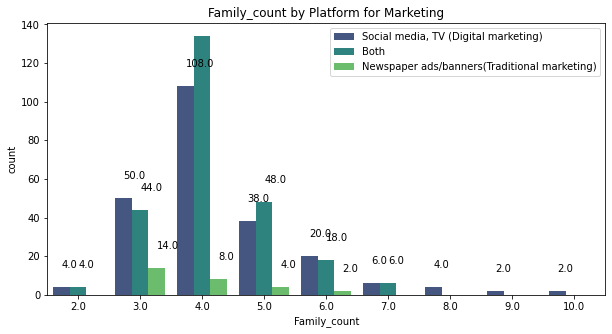

In [53]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=eg_d1.Family_count,hue=eg_d1.E_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Family_count by Platform for Marketing')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

Most of our respondents belong to Nuclear family and they tend to refer to Both the ways of Marketing platforms.As a whole, most of the people, woul either refer to both the type of platforms or just Social media.

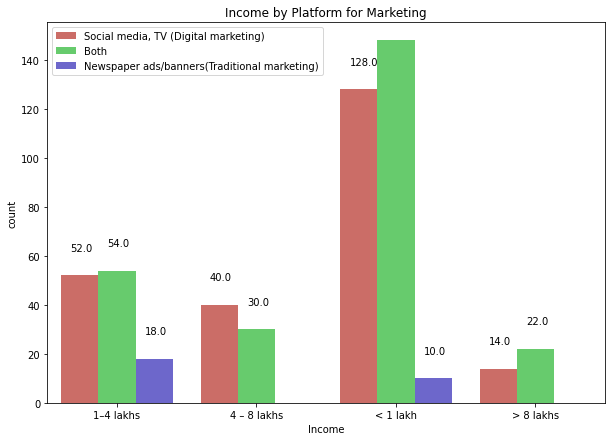

In [54]:
plt.figure(figsize=(10,7))
plot=sns.countplot(x=eg_d1.Income,hue=eg_d1.E_platform,palette="hls")
plt.legend(loc='upper left')
plt.title('Income by Platform for Marketing')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/4,p.get_height()+10))
plt.show()

* Most of the respondents had their income lesser than 1 lakh and majority of them referred to both Digital and Traditional ways of marketing .

* People with their income greater than 8 lakh(high income) rarely or never referred to Newspaper ads/ banners i.e the traditional way of marketing.

* Instances of people referring to just Newspaper ads/ banners i.e the traditional way of marketing is very less.



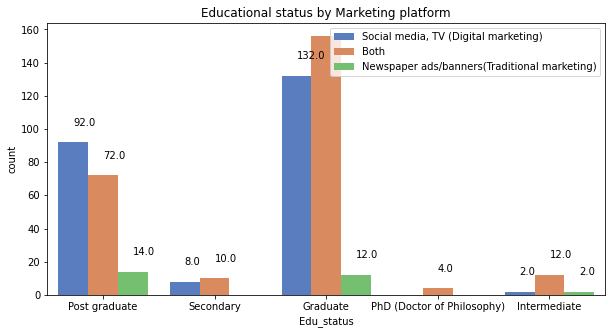

In [55]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=eg_d1.Edu_status,hue=eg_d1.E_platform,palette="muted")
plt.legend(loc='upper right')
plt.title('Educational status by Marketing platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With most of the respondents being Graduates, majority of them referred to both the Digital and Traditional ways of marketing.
* Majority of the post graduates referred to just the Social media, TV and such digital platforms before buying the electronic gadgets.

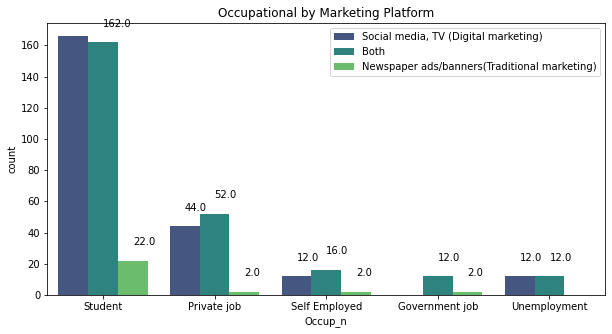

In [56]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=eg_d1.Occup_n,hue=eg_d1.E_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Occupational by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With students being the major portion of the respondents, there is almost equal proportion of them referring to both the ways of Marketing considered and just the Social media as a way of marketing.

* Overall, people who refer to both the ways of marketing before buying electronic gadgets are more in number.

# FURNITURES

In [ ]:
#Our target variable count
f_d1['F_platform'].value_counts()

Both                                            286
Social media, TV (Digital marketing)            154
Newspaper ads/banners(Traditional marketing)     76
Name: F_platform, dtype: int64

In [ ]:
import plotly.express as ex
ex.pie(f_d1,names='F_platform',title='Marketing Platform Distribution for Furnitures')

For Furnitures, majority(more than 50% in this case) of the customers referred to both Social media and Newspaper ads/banners before buying the furnitures. Very few (14.7%)people referred to just Newspaper ads/banners which is the traditional way of marketing.

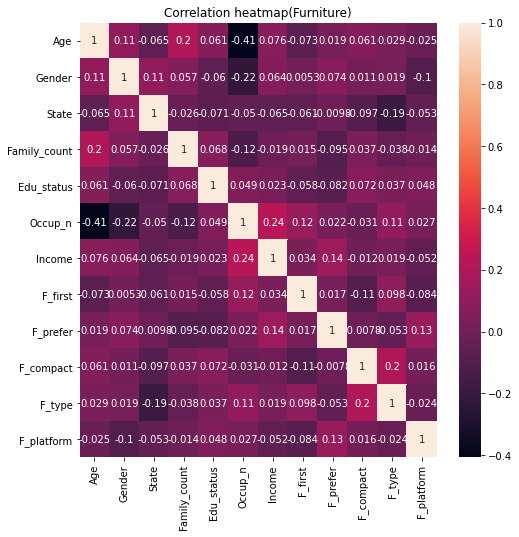

In [ ]:
ax = plt.axes()
plt.rc('figure',figsize=(6,6))
sns.heatmap(f_d2.corr('pearson'),annot=True,ax=ax)
ax.set_title('Correlation heatmap(Furniture)')
plt.show()


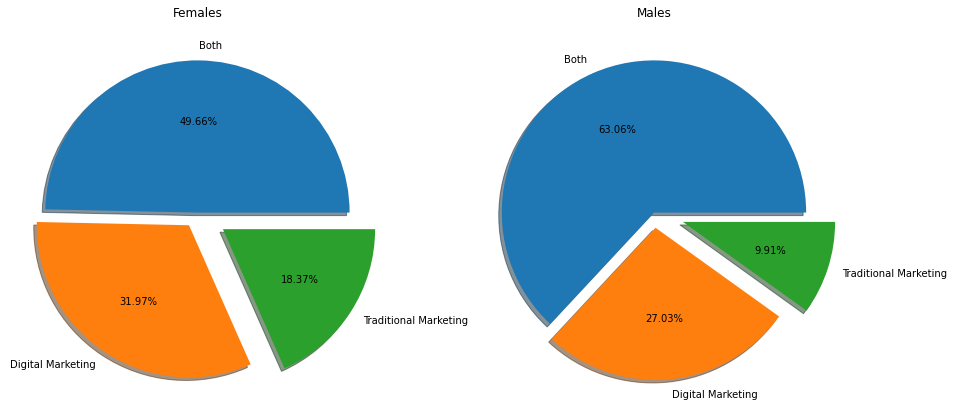

In [43]:
sizes_f = f_d1.loc[f_d1['Gender']=='Female']['F_platform'].value_counts()
sizes_m = f_d1.loc[f_d1['Gender']=='Male']['F_platform'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax2.title.set_text('Males')
plt.show()


* For Furnitures, majority of the customers referred to both Social media and Newspaper ads/banners before buying the electronic gadgets. Very few people referred to just Newspaper ads/banners which is the traditional way of marketing.

* Among the people who referred to just Newspaper ads/banners, female customers occupied a higher percentage.



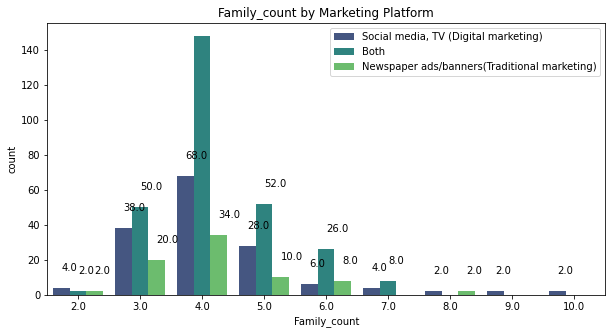

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=f_d1.Family_count,hue=f_d1.F_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Family_count by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

Most of our respondents belong to Nuclear family and they tend to refer to Both the ways of Marketing platforms.As a whole, most of the people, would either refer to both the type of platforms or just Social media.

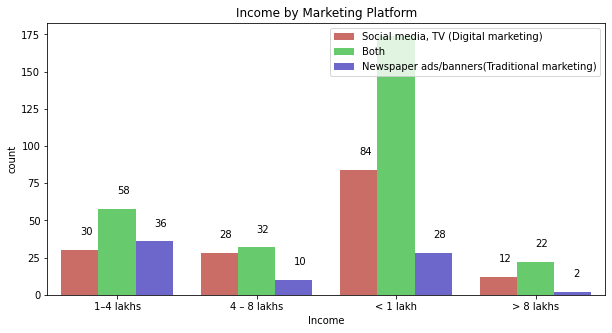

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=f_d1.Income,hue=f_d1.F_platform,palette="hls")
plt.legend(loc='upper right')
plt.title('Income by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* Most of the respondents had their income lesser than 1 lakh and majority of them referred to both Digital and Traditional ways of marketing .

* Very few instances of people with their income greater than 8 lakh(high income)  referred to Newspaper ads/ banners i.e the traditional way of marketing.

* Instances of people referring to just Newspaper ads/ banners i.e the traditional way of marketing is very less.



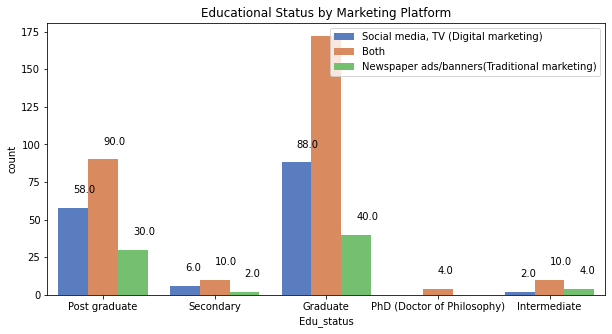

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=f_d1.Edu_status,hue=f_d1.F_platform,palette="muted")
plt.legend(loc='upper right')
plt.title('Educational Status by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With most of the respondents being Graduates, majority of them referred to both the Digital and Traditional ways of marketing.
* Overall, majority of the people referred to both the Social media, TV and such digital platforms as well as the newspaper ada/banners before buying the furnitures.

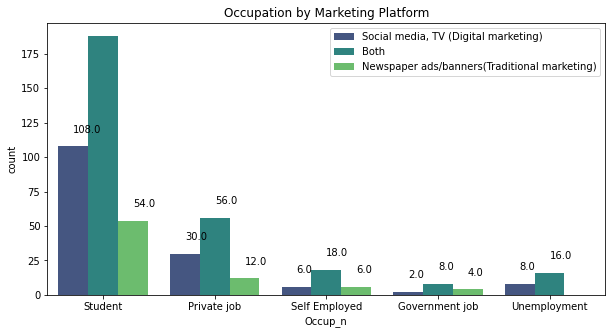

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=f_d1.Occup_n,hue=f_d1.F_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Occupation by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With students being the major portion of the respondents, most of them referred to both the ways of Marketing considered.

* Overall, people who refer to both the ways of marketing before buying furnitures are more in number.

# AUTOMOBILES

In [ ]:
#Our target variable count
a_d1['A_platform'].value_counts()

Both                                            288
Social media, TV (Digital marketing)            174
Newspaper ads/banners(Traditional marketing)     54
Name: A_platform, dtype: int64

In [ ]:
ex.pie(a_d1,names='A_platform',title='Marketing Platform Distribution for Automobiles')

For Automobiles, majority(more than 50% in this case) of the customers referred to both Social media and Newspaper ads/banners before buying the automobiles. Very few (10.5%)people referred to just Newspaper ads/banners which is the traditional way of marketing.

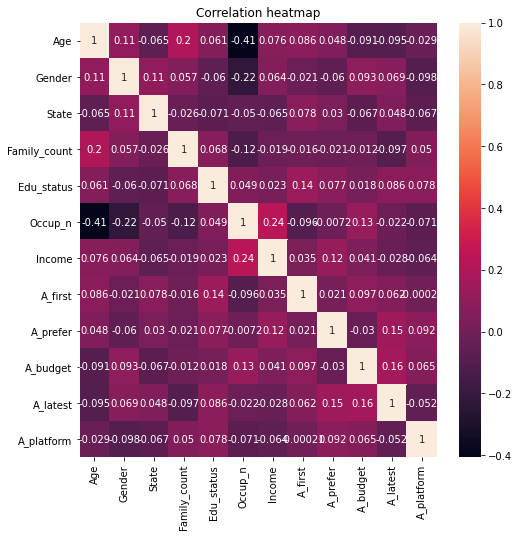

In [ ]:
ax = plt.axes()
plt.rc('figure',figsize=(8,8))
sns.heatmap(a_d2.corr('pearson'),annot=True,ax=ax)
ax.set_title('Correlation heatmap')
plt.show()


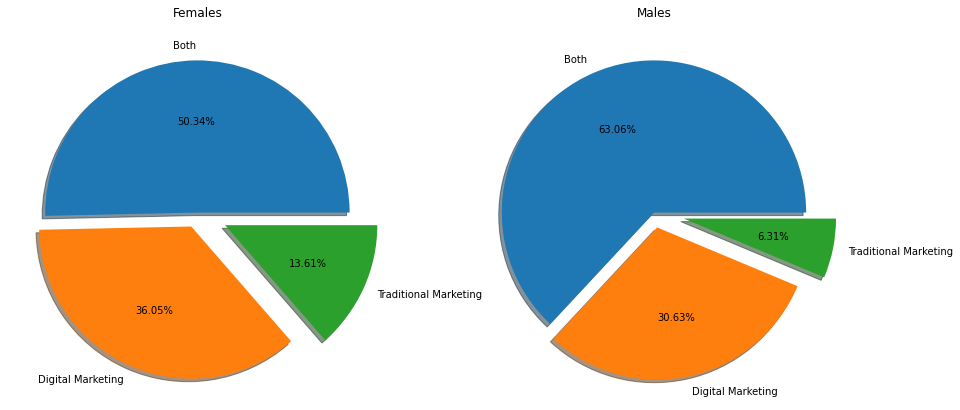

In [44]:
sizes_f = a_d1.loc[a_d1['Gender']=='Female']['A_platform'].value_counts()
sizes_m = a_d1.loc[a_d1['Gender']=='Male']['A_platform'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax2.title.set_text('Males')
plt.show()


* For Automobiles, majority of the customers referred to both Social media and Newspaper ads/banners before buying the Automobiles. Very few people referred to just Newspaper ads/banners which is the traditional way of marketing.

* Among the people who referred to just Newspaper ads/banners, female customers occupied a higher percentage.



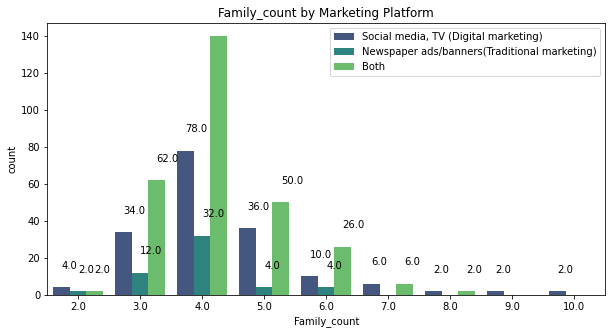

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=a_d1.Family_count,hue=a_d1.A_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Family_count by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

Most of our respondents belong to Nuclear family and they tend to refer to Both the ways of Marketing platforms.As a whole, most of the people, would either refer to both the type of platforms or just Social media.

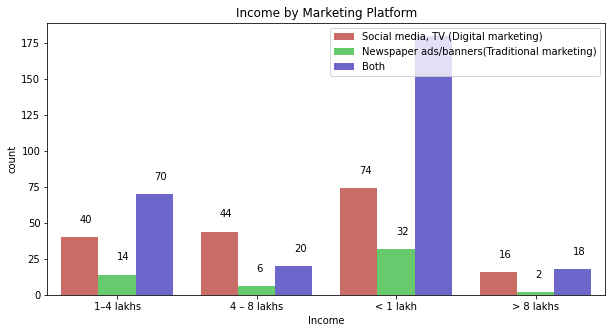

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=a_d1.Income,hue=a_d1.A_platform,palette="hls")
plt.legend(loc='upper right')
plt.title('Income by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* Most of the respondents had their income lesser than 1 lakh and majority of them referred to both Digital and Traditional ways of marketing .

* Very few instances of people with their income greater than 8 lakh(high income)  referred to Newspaper ads/ banners i.e the traditional way of marketing.

* Instances of people referring to just Newspaper ads/ banners i.e the traditional way of marketing is very less.



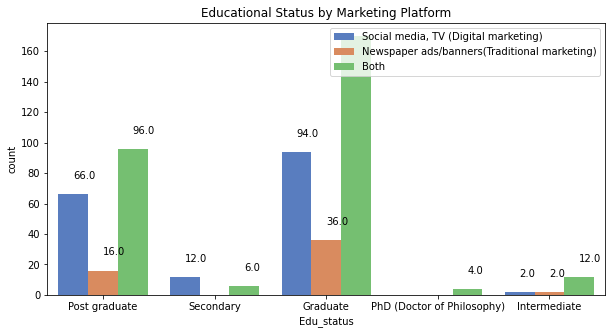

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=a_d1.Edu_status,hue=a_d1.A_platform,palette="muted")
plt.legend(loc='upper right')
plt.title('Educational Status by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With most of the respondents being Graduates, majority of them referred to both the Digital and Traditional ways of marketing.
* Overall, majority of the people referred to both the Social media, TV and such digital platforms as well as the newspaper ada/banners before buying the automobiles.

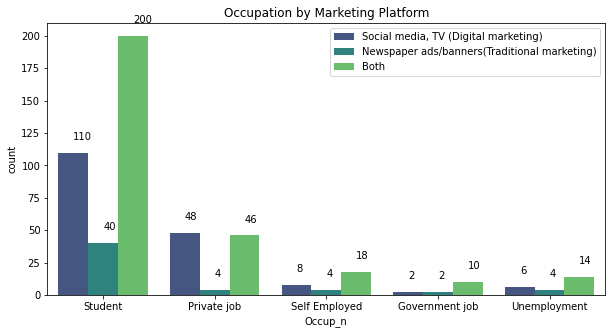

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=a_d1.Occup_n,hue=a_d1.A_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Occupation by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With students being the major portion of the respondents, most of them referred to both the ways of Marketing considered.

* Overall, people who refer to both the ways of marketing before buying automobiles are more in number.

# REAL ESTATE

In [ ]:
#Our target variable count
re_d1['R_platform'].value_counts()

Both                                            334
Newspaper ads/banners(Traditional marketing)    100
Social media, TV (Digital marketing)             82
Name: R_platform, dtype: int64

In [46]:
ex.pie(re_d1,names='R_platform',title='Marketing Platform Distribution for Real Estate')

For Real estates, majority(more than 60% in this case) of the customers referred to both Social media and Newspaper ads/banners before buying the land/plot. Very few (15.9%)people referred to just Social media which is the digital way of marketing.

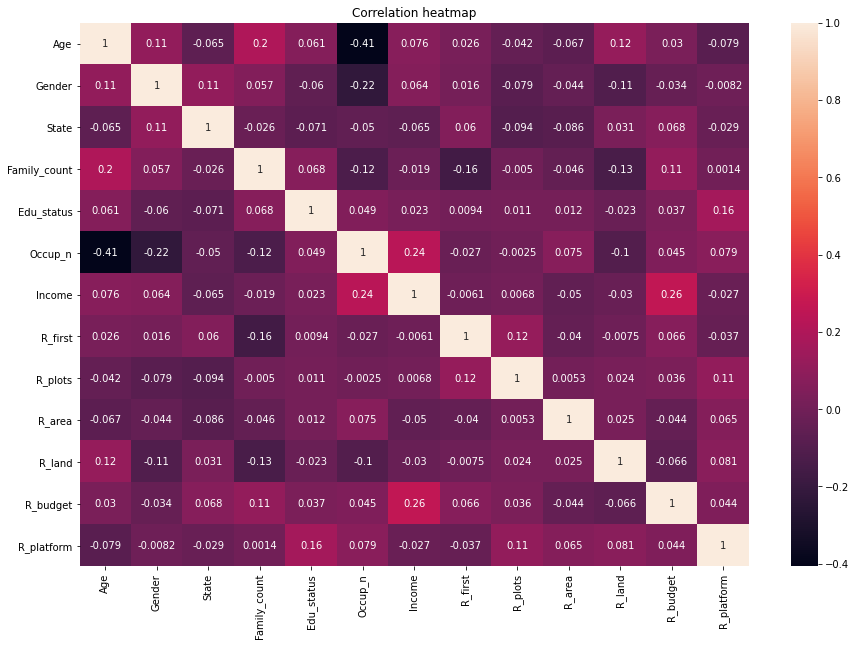

In [47]:
ax = plt.axes()
plt.rc('figure',figsize=(8,8))
sns.heatmap(re_d2.corr('pearson'),annot=True,ax=ax)
ax.set_title('Correlation heatmap')
plt.show()


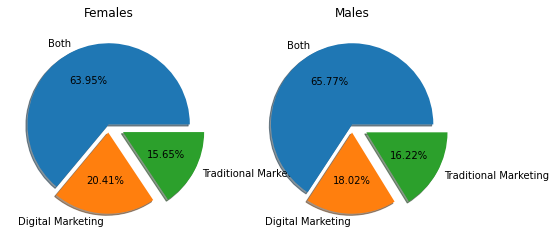

In [48]:
sizes_f = re_d1.loc[re_d1['Gender']=='Female']['R_platform'].value_counts()
sizes_m = re_d1.loc[re_d1['Gender']=='Male']['R_platform'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1,0.2],shadow=True,autopct='%1.2f%%',labels=['Both','Digital Marketing','Traditional Marketing'])
ax2.title.set_text('Males')
plt.show()


* For Real estates, majority of the customers referred to both Social media and Newspaper ads/banners before buying the real estates. Very few people referred to just Newspaper ads/banners which is the traditional way of marketing.

* Among the people who referred to just Newspaper ads/banners, male customers occupied a higher percentage.



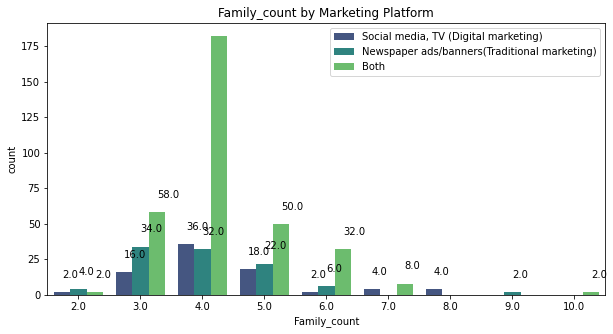

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=re_d1.Family_count,hue=re_d1.R_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Family_count by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

Most of our respondents belong to Nuclear family and they tend to refer to Both the ways of Marketing platforms.As a whole, most of the people, would either refer to both the type of platforms or just Social media.

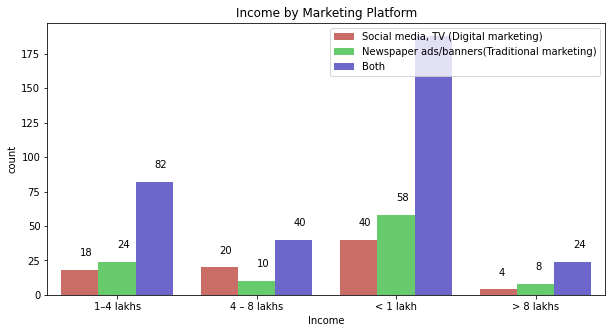

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=re_d1.Income,hue=re_d1.R_platform,palette="hls")
plt.legend(loc='upper right')
plt.title('Income by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* Most of the respondents had their income lesser than 1 lakh and majority of them referred to both Digital and Traditional ways of marketing, followed by newspaper ads/ banners way of marketing.


* Instances of people referring to just Social media i.e the digital way of marketing is very less.

* Unlike the other categories mentioned, Newspaper ads/ banners were referred to, in a fair proportion when it comes to buying real estates.



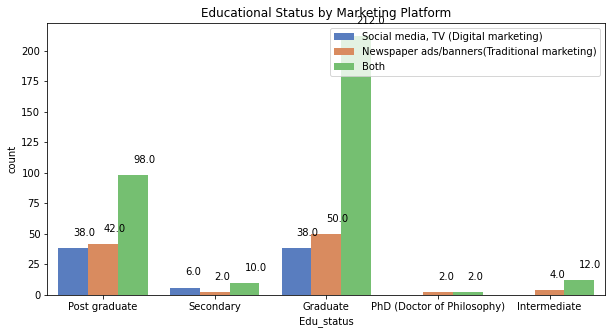

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=re_d1.Edu_status,hue=re_d1.R_platform,palette="muted")
plt.legend(loc='upper right')
plt.title('Educational Status by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With most of the respondents being Graduates, majority of them referred to both the Digital and Traditional ways of marketing.
* Overall, majority of the people referred to both the Social media, TV and such digital platforms as well as the newspaper ada/banners before buying the real estates.

* Among the people who referred to the Nespaper ads/banners before buying the real estates, under graduates and post graduates formed a major portion.

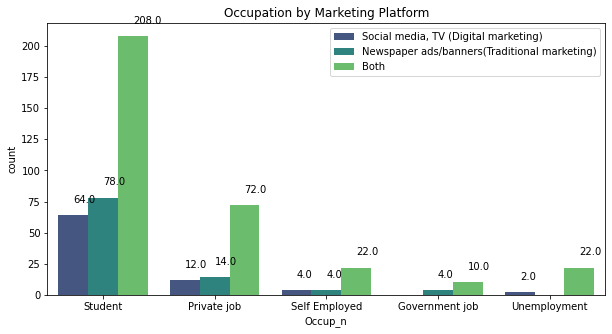

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=re_d1.Occup_n,hue=re_d1.R_platform,palette="viridis")
plt.legend(loc='upper right')
plt.title('Occupation by Marketing Platform')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+10))
plt.show()

* With students being the major portion of the respondents, most of them referred to both the ways of Marketing considered.

* Overall, people who refer to both the ways of marketing before buying real estates are more in number.

# <B> <U> <CENTER> MODEL BUILDING AND EVALUATION </B> </U> </CENTER>

# ELECTRONIC GADGETS

In [ ]:
Models=['GaussianNB','Random Forest','SVM','KNN']
E_accuracy=[]

In [ ]:
# Splitting the data
x = eg_d2.drop(['E_platform'], axis=1)
y = eg_d2['E_platform']
x_train, x_test, y_train, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Fitting and transforming the data into a scaler for accurate result
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
X_test_scaled1 = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

In [ ]:
#Class imbalance
print(y_train.value_counts())

0    180
2    160
1     21
Name: E_platform, dtype: int64


*Inference:-*

It can be seen that the three levels of the target variable are not of equal or near to equal proportion. Therefore, this class imbalance needs to be dealt with.

**Dealing with class imbalance**

In [ ]:
oversample = SMOTE()
X_balanced1, y_balanced1 = oversample.fit_resample(X_scaled, y_train.ravel())
# we have addressed the issue of oversampling here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
y_balanced1=pd.DataFrame(y_balanced1)
print(y_balanced1.value_counts())

2    180
1    180
0    180
dtype: int64


***Inference:-***

By using the oversampling method, the class imbalance has been dealt with and the levels of target variable are now proportionate in the train dataset. 


#### GaussianNB

---



Accuracy Score is 0.5355




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



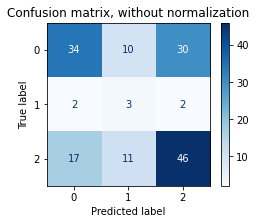

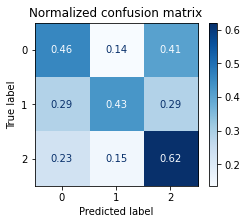

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.46      0.54        74
           1       0.12      0.43      0.19         7
           2       0.59      0.62      0.61        74

    accuracy                           0.54       155
   macro avg       0.45      0.50      0.44       155
weighted avg       0.59      0.54      0.55       155



In [ ]:
# training the model on training set
gnb_elec = GaussianNB()
gnb_elec.fit(X_balanced1, y_balanced1)
y_pred = gnb_elec.predict(X_test_scaled1)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test1, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(gnb_elec, X_test_scaled1, y_test1,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test1, y_pred)
print("Classification Report:",)
print (result1)
E_accuracy.append(round(accuracy_score(y_test1, y_pred.round())*100,3)) #appending to list storing accuracies

***Inference:-***

Implementation of GaussianNB model to our dataset, gave an accuracy of 53.55%. Furthermore, the diagonal elements of the normalized confusion matrix tells us that the correctly identified values are more than that of the ones incorrectly identified. However, the accuracy of 53.55% is not good enough to proceed with the prediction of the apt platform for marketing of electronic gadgets.

#### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy Score is 0.8323




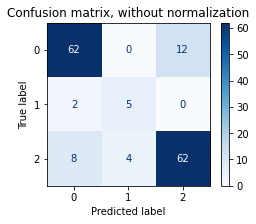

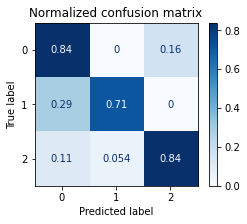

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.56      0.71      0.63         7
           2       0.84      0.84      0.84        74

    accuracy                           0.83       155
   macro avg       0.75      0.80      0.77       155
weighted avg       0.84      0.83      0.83       155



In [ ]:
RFC_elec=RandomForestClassifier()
RFC_elec.fit(X_balanced1, y_balanced1)
y_pred_RF = RFC_elec.predict(X_test_scaled1)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test1, y_pred_RF)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred_RF)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(RFC_elec, X_test_scaled1, y_test1,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test1,y_pred_RF)
print("Classification Report:",)
print (result1)
E_accuracy.append(round(accuracy_score(y_test1, y_pred_RF.round())*100,3)) #appending to list storing accuracies

***Inference:-***

Implementation of Random Forest model to our dataset, gave an accuracy of 83.23%. Furthermore, the diagonal elements of the normalized confusion matrix tells us that the true values are more than that of the ones incorrectly identified. The number of instances where the label '0' predicted as '1' and the label '1' predicted as '2' is exactly zero. 

So, the Random Forest with 83.23% accuracy along with good precision and sensitivity is doing a good job in predicting the apt platform for marketing the Electronic gadgets.

#### SVM

In [ ]:
#Training the model without hyper parameter tuning
# train the model on train set
SVC_elec = SVC()
SVC_elec.fit(X_balanced1,y_balanced1)  
# print prediction results
predictions = SVC_elec.predict(X_test_scaled1)
#Model evaluation
result1 = classification_report(y_test1,predictions)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        74
           1       0.33      0.71      0.45         7
           2       0.67      0.66      0.67        74

    accuracy                           0.63       155
   macro avg       0.55      0.66      0.58       155
weighted avg       0.65      0.63      0.64       155



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



The accuracy of the SVM model is 63% which is not good enough. The hyperparametric tuning of model might yield better results.

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 10],'gamma': [1,0.001],'kernel': ['rbf']}
grid_elec = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid_elec.fit(X_balanced1, y_balanced1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.676, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.611, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:76

[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.528, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.528, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.454, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ........... C=10, gamma=1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.815, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.546, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.481, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.463, total=   0.0s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_elec.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_elec.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy Score is 0.7935




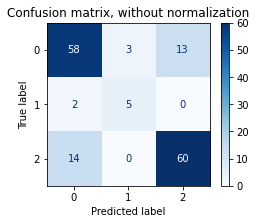

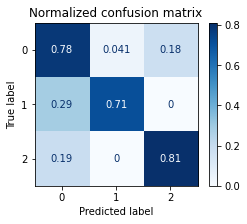

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        74
           1       0.62      0.71      0.67         7
           2       0.82      0.81      0.82        74

    accuracy                           0.79       155
   macro avg       0.74      0.77      0.76       155
weighted avg       0.79      0.79      0.79       155



In [ ]:
grid_predictions = grid_elec.predict(X_test_scaled1)
  
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test1, grid_predictions)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,grid_predictions)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(grid_elec, X_test_scaled1, y_test1,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test1,grid_predictions)
print("Classification Report:",)
print (result1)
E_accuracy.append(round(accuracy_score(y_test1, grid_predictions.round())*100,3))

***Inference:-***

The SVM model after hyperparametric tuning yields an accuracy result  of 79.35%. The original model(without hyperparameter tuning ) which gave an accuracy of 63% has been increased to 79.35% with hyperparameter tuning. Thus, it has improved the results.

#### KNN 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was pa

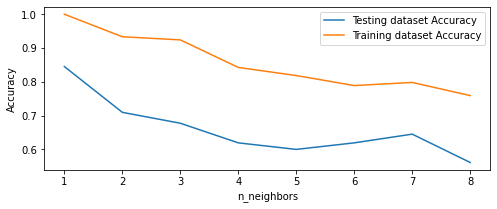

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    knn.fit(X_balanced1, y_balanced1)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_balanced1, y_balanced1)
    test_accuracy[i] = knn.score(X_test_scaled1, y_test1)
  
# Generate plot
plt.rc('figure',figsize=(8,3))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

*Inference:-*

The training and testing dataset accuracy is the highest at k=1. Since the optimal value of k is 1. Now, the KNN model will be fitted using the 'hamming' distance metric.

In [ ]:
knn_elec = KNeighborsClassifier(n_neighbors=1,metric='hamming')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score is 0.8452




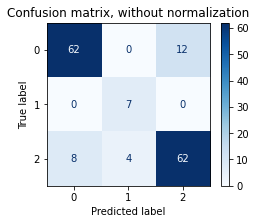

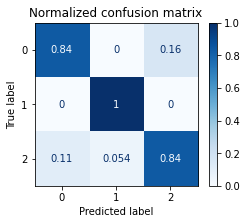

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        74
           1       0.64      1.00      0.78         7
           2       0.84      0.84      0.84        74

    accuracy                           0.85       155
   macro avg       0.79      0.89      0.83       155
weighted avg       0.85      0.85      0.85       155



In [ ]:
knn_elec.fit(X_balanced1, y_balanced1)
y_pred = knn_elec.predict(X_test_scaled1)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test1, y_pred)))
print()
#print(pd.DataFrame(onfusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(knn_elec, X_test_scaled1, y_test1,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test1,y_pred)
print("Classification Report:",)
print (result1)
E_accuracy.append(round(accuracy_score(y_test1, y_pred.round())*100,3))

***Inference:-***

For the Electronics gadgets dataset, the KNN model has given an accuracy of 84.52% with the optimal k value as 1. The precision and sensitivity measures are good enough too.


# FURNITURES

In [ ]:
F_accuracy=[]

In [ ]:
# Splitting the data
x = f_d2.drop(['F_platform'], axis=1)
y = f_d2['F_platform']
x_train, x_test, y_train, y_test2 = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Fitting and transforming the data into a scaler for accurate result
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
X_test_scaled2 = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

In [ ]:
print(y_train.value_counts())

0    197
2    108
1     56
Name: F_platform, dtype: int64


**Dealing with class imbalance**

In [ ]:
oversample = SMOTE()
X_balanced2, y_balanced2 = oversample.fit_resample(X_scaled, y_train.ravel())
# we have addressed the issue of oversampling here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
y_balanced2=pd.DataFrame(y_balanced2)
print(y_balanced2.value_counts())


2    197
1    197
0    197
dtype: int64


***Inference:-***

By using the oversampling method, the class imbalance has been dealt with and the levels of target variable are now proportionate in the train dataset.


#### GaussianNB

Accuracy Score is 0.4581




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



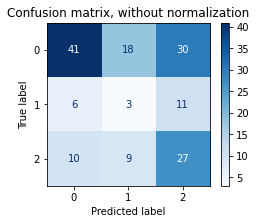

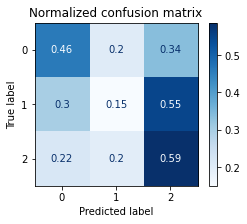

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.46      0.56        89
           1       0.10      0.15      0.12        20
           2       0.40      0.59      0.47        46

    accuracy                           0.46       155
   macro avg       0.41      0.40      0.39       155
weighted avg       0.54      0.46      0.48       155



In [ ]:
# training the model on training set
gnb_furn = GaussianNB()
gnb_furn.fit(X_balanced2, y_balanced2)
y_pred = gnb_furn.predict(X_test_scaled2)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test2, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(gnb_furn, X_test_scaled2, y_test2,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test2, y_pred)
print("Classification Report:",)
print (result1)
F_accuracy.append(round(accuracy_score(y_test2, y_pred.round())*100,3))

***Inference:-***

For the Furniture dataset, the GaussianNB has resulted in an accuracy as low as 45.81%. The sensitivity and precision are not good enough too. Since, almost all the classification metrics show the poor performance of the model, it can be said that GaussianNB is not suitable for the Furniture dataset.

#### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy Score is 0.8581




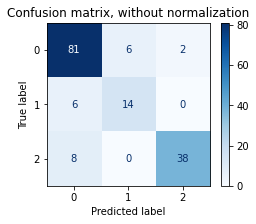

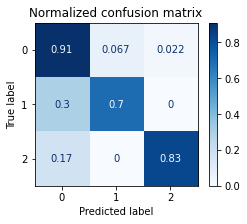

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        89
           1       0.70      0.70      0.70        20
           2       0.95      0.83      0.88        46

    accuracy                           0.86       155
   macro avg       0.83      0.81      0.82       155
weighted avg       0.86      0.86      0.86       155



In [ ]:
RFC_furn=RandomForestClassifier()
RFC_furn.fit(X_balanced2,y_balanced2)
y_pred_RF = RFC_furn.predict(X_test_scaled2)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test2, y_pred_RF)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred_RF)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(RFC_furn, X_test_scaled2, y_test2,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test2,y_pred_RF)
print("Classification Report:",)
print (result1)
F_accuracy.append(round(accuracy_score(y_test2, y_pred_RF.round())*100,3))

***Inference:-***

For the furniture dataset, the implementation of the Random Forest resulted in 85.81 % accuracy. The sensitivity is 91% which is a good indicator that the most appropriate platform would be correctly identified.

#### SVM

In [ ]:
#Training the model without hyper parameter tuning
# train the model on train set
SVC_furn = SVC()
SVC_furn.fit(X_balanced2,y_balanced2)
# print prediction results
predictions = SVC_furn.predict(X_test_scaled2)
print(classification_report(y_test2, predictions))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65        89
           1       0.41      0.65      0.50        20
           2       0.54      0.48      0.51        46

    accuracy                           0.59       155
   macro avg       0.54      0.59      0.55       155
weighted avg       0.60      0.59      0.59       155



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 10],'gamma': [1,0.001],'kernel': ['rbf']}

grid_furn = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid_furn.fit(X_balanced2,y_balanced2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.568, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.576, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.602, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.328, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:76

[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.432, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.356, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.824, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.847, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.822, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.890, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.890, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.432, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.492, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.466, total=   0.0s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_furn.best_params_)  
# print how our model looks after hyper-parameter tuning
print(grid_furn.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy Score is 0.7742




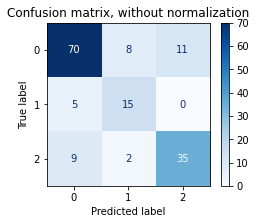

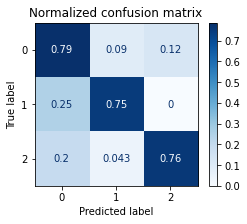

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.60      0.75      0.67        20
           2       0.76      0.76      0.76        46

    accuracy                           0.77       155
   macro avg       0.73      0.77      0.75       155
weighted avg       0.78      0.77      0.78       155



In [ ]:
grid_predictions = grid_furn.predict(X_test_scaled2)
  
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test2, grid_predictions)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,grid_predictions)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(grid_furn, X_test_scaled2, y_test2,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test2,grid_predictions)
print("Classification Report:",)
print (result1)
F_accuracy.append(round(accuracy_score(y_test2, grid_predictions.round())*100,3))

***Inference:-***

The SVM model for Furniture dataset after hyperparametric tuning yields an accuracy result  of 77.42%. The original model(without hyperparameter tuning ) which gave an accuracy of 59% has been increased to 77.42% with hyperparameter tuning. Thus, it has improved the results.


#### KNN 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was pa

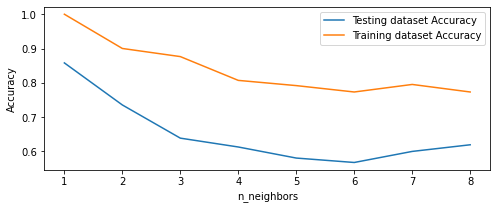

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    knn.fit(X_balanced2,y_balanced2)      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_balanced2,y_balanced2)
    test_accuracy[i] = knn.score(X_test_scaled2, y_test2)  
# Generate plot
plt.rc('figure',figsize=(8,3))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_furn = KNeighborsClassifier(n_neighbors=1,metric='hamming')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score is 0.8581




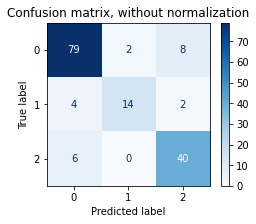

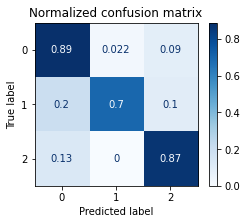

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        89
           1       0.88      0.70      0.78        20
           2       0.80      0.87      0.83        46

    accuracy                           0.86       155
   macro avg       0.85      0.82      0.83       155
weighted avg       0.86      0.86      0.86       155



In [ ]:
knn_furn.fit(X_balanced2, y_balanced2)
y_pred = knn_furn.predict(X_test_scaled2)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test2, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(knn_furn, X_test_scaled2, y_test2,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test2,y_pred)
print("Classification Report:",)
print (result1)
F_accuracy.append(round(accuracy_score(y_test2, y_pred.round())*100,3))

***Inference:-***

For the Furniture dataset, the KNN classifier yielded an accuracy of 85.81% and had a good sensitivity of 89%. It can be said that KNN is doing a good job in predicting the apt platform for the marketing of Furnitures.

#### AUTOMOBILES

In [ ]:
A_accuracy=[]

In [ ]:
# Splitting the data
#Splitting the data
x = a_d2.drop(['A_platform'], axis=1)
y = a_d2['A_platform']
x_train, x_test, y_train, y_test3 = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Fitting and transforming the data into a scaler for accurate result
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
X_test_scaled3 = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

**Dealing with class imbalance**

In [ ]:
print(y_train.value_counts())

0    200
2    123
1     38
Name: A_platform, dtype: int64


In [ ]:
oversample = SMOTE()
X_balanced3, y_balanced3 = oversample.fit_resample(X_scaled, y_train.ravel())
# we have addressed the issue of oversampling here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
y_balanced3=pd.DataFrame(y_balanced3)
print(y_balanced3.value_counts())

2    200
1    200
0    200
dtype: int64


***Inference:-***

By using the oversampling method, the class imbalance has been dealt with and the levels of target variable are now proportionate in the train dataset.


#### GaussianNB

Accuracy Score is 0.3226




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



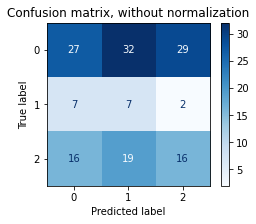

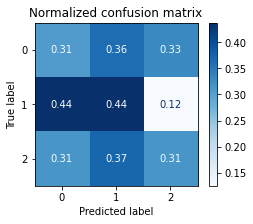

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        88
           1       0.12      0.44      0.19        16
           2       0.34      0.31      0.33        51

    accuracy                           0.32       155
   macro avg       0.33      0.35      0.30       155
weighted avg       0.43      0.32      0.35       155



In [ ]:
# training the model on training set
gnb_auto = GaussianNB()
gnb_auto.fit(X_balanced3, y_balanced3)
y_pred = gnb_auto.predict(X_test_scaled3)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test3, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(gnb_auto, X_test_scaled3, y_test3,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test3, y_pred)
print("Classification Report:",)
print (result1)
A_accuracy.append(round(accuracy_score(y_test3, y_pred.round())*100,3))

***Inference:-***

For the Automobile dataset, the GaussianNB gave an accuracy as low as 32.26%, with a very poor sensitivity score. Thus, it can be said that the GaussianNB is not the apt model for the dataset considered here.

#### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy Score is 0.8516




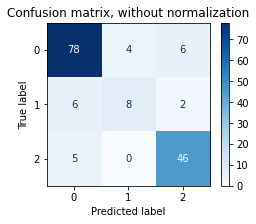

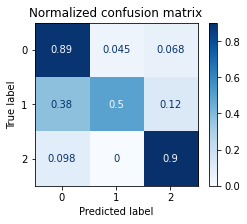

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        88
           1       0.67      0.50      0.57        16
           2       0.85      0.90      0.88        51

    accuracy                           0.85       155
   macro avg       0.80      0.76      0.78       155
weighted avg       0.85      0.85      0.85       155



In [ ]:
RFC_auto=RandomForestClassifier()
RFC_auto.fit(X_balanced3,y_balanced3)
y_pred_RF = RFC_auto.predict(X_test_scaled3)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test3, y_pred_RF)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred_RF)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(RFC_auto, X_test_scaled3, y_test3,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test3,y_pred_RF)
print("Classification Report:",)
print (result1)
A_accuracy.append(round(accuracy_score(y_test3, y_pred_RF.round())*100,3))

***Inference:-***

The implementation of Random Forest for the Automobile dataset, gave an accuracy of 85.16% with decent precision and sensitivity(recall) values. The above obtained normalized confusion matrix further supports the same inference with greater instances of correctly labelled values.

#### SVM

In [ ]:
#Training the model without hyper parameter tuning
# train the model on train set
SVC_auto = SVC()
SVC_auto.fit(X_balanced3,y_balanced3)
  
# print prediction results
predictions = SVC_auto.predict(X_test_scaled3)
print(classification_report(y_test3, predictions))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        88
           1       0.23      0.69      0.35        16
           2       0.60      0.51      0.55        51

    accuracy                           0.54       155
   macro avg       0.52      0.57      0.50       155
weighted avg       0.62      0.54      0.56       155



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 10],'gamma': [1,0.001],'kernel': ['rbf']}

grid_auto = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_auto.fit(X_balanced3,y_balanced3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.575, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.542, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:76

[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.433, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.450, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.450, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.842, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.842, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.433, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.450, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.450, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.467, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_auto.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_auto.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy Score is 0.7161




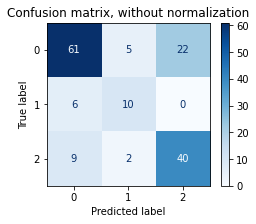

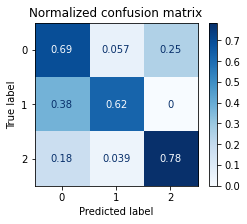

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        88
           1       0.59      0.62      0.61        16
           2       0.65      0.78      0.71        51

    accuracy                           0.72       155
   macro avg       0.68      0.70      0.69       155
weighted avg       0.73      0.72      0.72       155



In [ ]:
grid_predictions = grid_auto.predict(X_test_scaled3)
  
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test3, grid_predictions)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,grid_predictions)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(grid_auto, X_test_scaled3, y_test3,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test3,grid_predictions)
print("Classification Report:",)
print (result1)
A_accuracy.append(round(accuracy_score(y_test3, grid_predictions.round())*100,3))

***Inference:-***


The SVM model for Automobile dataset after hyperparametric tuning yields an accuracy result  of 71.61%. The original model(without hyperparameter tuning ) which gave an accuracy of 54% has been increased to 71.61% with hyperparameter tuning. Thus, it has improved the results.


#### KNN 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was pa

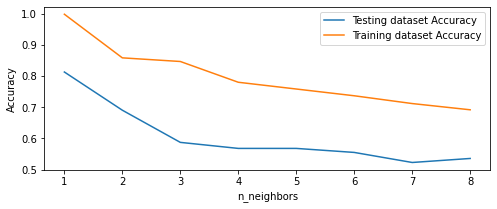

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    knn.fit(X_balanced3,y_balanced3)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_balanced3,y_balanced3)
    test_accuracy[i] = knn.score(X_test_scaled3, y_test3)
  
# Generate plot
plt.rc('figure',figsize=(8,3))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_auto = KNeighborsClassifier(n_neighbors=1,metric='hamming')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score is 0.8129




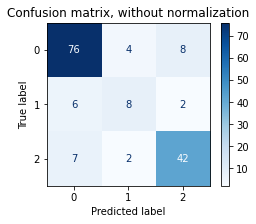

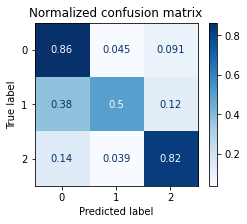

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        88
           1       0.57      0.50      0.53        16
           2       0.81      0.82      0.82        51

    accuracy                           0.81       155
   macro avg       0.74      0.73      0.74       155
weighted avg       0.81      0.81      0.81       155



In [ ]:
knn_auto.fit(X_balanced3, y_balanced3)
y_pred = knn_auto.predict(X_test_scaled3)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test3, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(knn_auto, X_test_scaled3, y_test3,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test3,y_pred)
print("Classification Report:",)
print (result1)
A_accuracy.append(round(accuracy_score(y_test3, y_pred.round())*100,3))

***Inference:-***

With theimplementation of KNN model with k=1, 81.29% accuracy was procured. Further, the other classification metrics like Sensitivity and precision are above 81.29%. Hence, the KNN model has done a pretty decent job in predicting the apt platform for marketing of the Automobiles.

#### REAL ESTATE

---



In [ ]:
R_accuracy=[]

In [ ]:
# Splitting the data
x = re_d2.drop(['R_platform'], axis=1)
y = re_d2['R_platform']
x_train, x_test, y_train, y_test4 = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Fitting and transforming the data into a scaler for accurate result
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
X_test_scaled4 = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

**Dealing with class imbalance**

In [ ]:
print(y_train.value_counts())

0    240
1     67
2     54
Name: R_platform, dtype: int64


In [ ]:
oversample = SMOTE()
X_balanced4, y_balanced4 = oversample.fit_resample(X_scaled, y_train.ravel())
# we have addressed the issue of oversampling here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
y_balanced4=pd.DataFrame(y_balanced4)
print(y_balanced4.value_counts())

2    240
1    240
0    240
dtype: int64


***Inference:-***

By using the oversampling method, the class imbalance has been dealt with and the levels of target variable are now proportionate in the train dataset.


#### GaussianNB

---



Accuracy Score is 0.4194




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



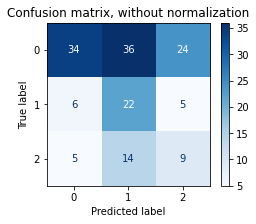

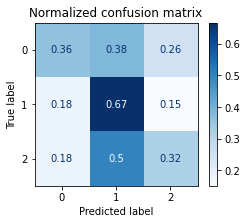

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.36      0.49        94
           1       0.31      0.67      0.42        33
           2       0.24      0.32      0.27        28

    accuracy                           0.42       155
   macro avg       0.43      0.45      0.39       155
weighted avg       0.57      0.42      0.44       155



In [ ]:
# training the model on training set
gnb_re = GaussianNB()
gnb_re.fit(X_balanced4, y_balanced4)
y_pred = gnb_re.predict(X_test_scaled4)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test4, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(gnb_re, X_test_scaled4, y_test4,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test4, y_pred)
print("Classification Report:",)
print (result1)
R_accuracy.append(round(accuracy_score(y_test4, y_pred .round())*100,3))

***Inferences:-***

For the dataset regarding Real estate, the Gaussian Naive Bayes, gave an accuracy as low as 41.94% with
a very low sensitivity score.

#### Random Forest

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy Score is 0.8839




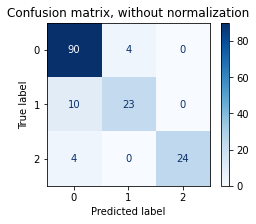

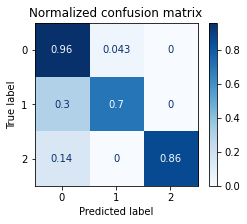

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        94
           1       0.85      0.70      0.77        33
           2       1.00      0.86      0.92        28

    accuracy                           0.88       155
   macro avg       0.91      0.84      0.87       155
weighted avg       0.89      0.88      0.88       155



In [ ]:
RFC_re=RandomForestClassifier()
RFC_re.fit(X_balanced4,y_balanced4)
y_pred_RF = RFC_re.predict(X_test_scaled4)
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test4, y_pred_RF)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred_RF)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(RFC_re, X_test_scaled4, y_test4,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test4,y_pred_RF)
print("Classification Report:",)
print (result1)
R_accuracy.append(round(accuracy_score(y_test4, y_pred_RF.round())*100,3))

***Inferences:-***

With the implementation of Random Forest for the Real estate dataset, an accuracy of 88.39% has been procured and a high sensitivity of 96%. Therefore, it can be said that the model is doing a good job in predicting the target variable.

#### SVM

In [ ]:
#Training the model without hyper parameter tuning
# train the model on train set
SVC_re = SVC()
SVC_re.fit(X_balanced4,y_balanced4)
  
# print prediction results
predictions = SVC_re.predict(X_test_scaled4)
print(classification_report(y_test4, predictions))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        94
           1       0.49      0.52      0.50        33
           2       0.62      0.71      0.67        28

    accuracy                           0.69       155
   macro avg       0.64      0.66      0.65       155
weighted avg       0.70      0.69      0.69       155



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 10],'gamma': [1,0.001],'kernel': ['rbf']}

grid_re = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_re.fit(X_balanced4,y_balanced4)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.597, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:76

[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.486, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.424, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.403, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.868, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.951, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConv

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.965, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.924, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.958, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.486, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.444, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.458, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.424, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
/usr/local

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_re.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_re.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy Score is 0.8968




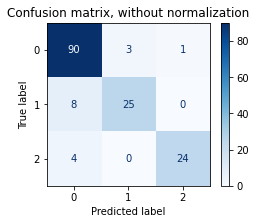

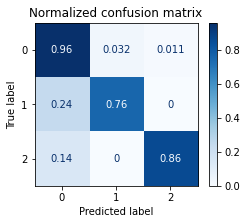

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        94
           1       0.89      0.76      0.82        33
           2       0.96      0.86      0.91        28

    accuracy                           0.90       155
   macro avg       0.91      0.86      0.88       155
weighted avg       0.90      0.90      0.90       155



In [ ]:
grid_predictions = grid_re.predict(X_test_scaled4)
  
#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test4, grid_predictions)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,grid_predictions)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(grid_re, X_test_scaled4, y_test4,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test4,grid_predictions)
print("Classification Report:",)
print (result1)
R_accuracy.append(round(accuracy_score(y_test4, grid_predictions.round())*100,3))

***Inferences:-***

The SVM model for Real estate dataset after hyperparametric tuning yields an accuracy result  of 89.68%. The original model(without hyperparameter tuning ) which gave an accuracy of 69% has been increased to 89.68% with hyperparameter tuning. Thus, it has improved the results.
The sensitivity of the model is 96% which is a good score.Therefore, it can be said that SVM model with hyper-parameter tuning has the highest accuracy among those of other models and is doing a good job in predicting the apt marketing platform for Real estate.


#### KNN 

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was pa

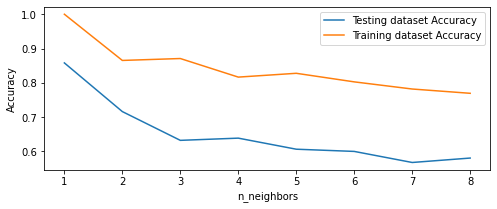

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    knn.fit(X_balanced4,y_balanced4)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_balanced4,y_balanced4)
    test_accuracy[i] = knn.score(X_test_scaled4, y_test4)
  
# Generate plot
plt.rc('figure',figsize=(8,3))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_re = KNeighborsClassifier(n_neighbors=1,metric='hamming')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score is 0.8581




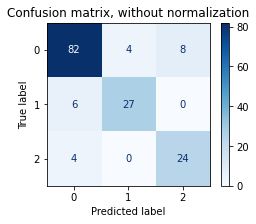

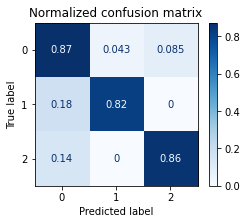

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        94
           1       0.87      0.82      0.84        33
           2       0.75      0.86      0.80        28

    accuracy                           0.86       155
   macro avg       0.84      0.85      0.84       155
weighted avg       0.86      0.86      0.86       155



In [ ]:
knn_re.fit(X_balanced4, y_balanced4)
y_pred = knn_re.predict(X_test_scaled4)

#Model evaluation
plt.rc('figure',figsize=(4,3))
print('Accuracy Score is {:.4}'.format(accuracy_score(y_test4, y_pred)))
print()
#print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
class_names = ['0','1','2']
titles_opt = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
for title, normalize in titles_opt:
    disp = plot_confusion_matrix(knn_re, X_test_scaled4, y_test4,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

print()  
plt.show()
result1 = classification_report(y_test4,y_pred)
print("Classification Report:",)
print (result1)
R_accuracy.append(round(accuracy_score(y_test4, y_pred.round())*100,3))

***Inferences:-***

With the implementation of KNN model with k=1, 86% accuracy was procured. Further, the other classification metrics like Sensitivity and precision are above 85%. Hence, the KNN model has done a pretty decent job in predicting the apt platform for marketing of the Real estates.

<u>**SELECTION OF THE BEST MODEL FOR THE FOUR CATEGORIES**</u>

**Electronic Gadgets**

In [ ]:
E_compare = pd.DataFrame({'Methods': Models,
                       'Scores': E_accuracy})
E_compare.sort_values(by='Scores',ascending=False)

,Methods,Scores
3,KNN,84.516
1,Random Forest,83.226
2,SVM,79.355
0,GaussianNB,53.548


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn_elec.score(X_balanced1, y_balanced1)))
print('Test set score: {:.4f}'.format(knn_elec.score(X_test_scaled1, y_test1)))

Training set score: 1.0000
Test set score: 0.8452


<b>In general,100% train accuracy means there has been a  massive overfit. Now, 10-fold cross validation will be used to prevent over-fitting.</b>

In [ ]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(knn_elec, X_balanced1, y_balanced1, cv = 10, scoring='accuracy')
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8481


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packag

*Inferences:-*

---



**The accuracy obtained from implementing the original KNN model was 84.51%.**

**Using the mean cross-validation, we can conclude that we expect the model to be around 84.81% accurate on average.So, the 10-fold cross-validation accuracy results in performance improvement for this model.Thus, the KNN model with 10 cross validation applied would be the best model to predict the best platform to maket the Electronic gadgets.**

**Furnitures**

In [ ]:
F_compare = pd.DataFrame({'Methods': Models,
                       'Scores': F_accuracy})
F_compare.sort_values(by='Scores',ascending=False)

,Methods,Scores
1,Random Forest,85.806
3,KNN,85.806
2,SVM,77.419
0,GaussianNB,45.806


**Check for overfitting and underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(RFC_furn.score(X_balanced2, y_balanced2)))
print('Test set score: {:.4f}'.format(RFC_furn.score(X_test_scaled2, y_test2)))

Training set score: 1.0000
Test set score: 0.8581


**In general,100% train accuracy means there has been a  massive overfit. Now, 10-fold cross validation will be used to prevent over-fitting.**

In [ ]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(RFC_furn, X_balanced1, y_balanced1, cv = 10, scoring='accuracy')
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

Average cross-validation score: 0.8852


*Inferences:-*

---



**Among the four models implemented,the Random forest had the highest accuracy (very closer to that of KNN) of 85.81%. 
The training-set accuracy score is 100% and hence the model is overfitting.**

 **The accuracy obtained from implementing the original KNN model was 85.81%. 
Using the mean cross-validation, we can conclude that we expect the model to be around 88.52% accurate on average.So, the 10-fold cross-validation accuracy results in performance improvement for this model.Thus, the Random Forest model with 10 cross validation applied would be the best model to predict the best platform for marketing of the Furniture products.**

**Automobiles**

In [ ]:
A_compare = pd.DataFrame({'Methods': Models,
                       'Scores': A_accuracy})
A_compare.sort_values(by='Scores',ascending=False)

,Methods,Scores
1,Random Forest,85.161
3,KNN,81.290
2,SVM,71.613
0,GaussianNB,32.258


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(RFC_auto .score(X_balanced3, y_balanced3)))
print('Test set score: {:.4f}'.format(RFC_auto.score(X_test_scaled3, y_test3)))

Training set score: 0.9983
Test set score: 0.8516


**99% train accuracy means there has been a  massive overfit. Now, 10-fold cross validation will be used to prevent over-fitting.**

In [ ]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(RFC_auto, X_balanced3, y_balanced3, cv = 10, scoring='accuracy')
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

Average cross-validation score: 0.9000


*Inferences:-*

**The best model implementation for Automobiles dataset would be the Random Forest with the accuracy of 85.16%. However, the training score of 100% indicates the model overfitting and hence is dealt with k- cross validation.**

**The original RF model which gave an accuracy of 85.16% is now increased to 90%. So, the 10-fold cross-validation accuracy results in performance improvement for this model.Thus, the Random Forest model with 10 cross validation applied would be the best model to predict the best platform for marketing of the Automobile products.**

**Real Estates**

In [ ]:
R_compare = pd.DataFrame({'Methods': Models,
                       'Scores': R_accuracy})
R_compare.sort_values(by='Scores',ascending=False)

,Methods,Scores
2,SVM,89.677
1,Random Forest,88.387
3,KNN,85.806
0,GaussianNB,41.935


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid_re .score(X_balanced4, y_balanced4)))
print('Test set score: {:.4f}'.format(grid_re.score(X_test_scaled4, y_test4)))

Training set score: 0.9861
Test set score: 0.8968


***Inferences:-***

---



**The training-set accuracy score is 0.9861 while the test-set accuracy to be 0.8968. These two values are quite comparable. So, there is no sign of overfitting.**

**For the Real estate marketing dataset, the SVC model with an acccuracy of 89.68% would provide the best results among the other models considered. Thus SVC model can be selected for predicting the apt platform for marketing of Real estates.**